### Project Describtion and Project Goals 
#### Project Describtion

In this Dataset are presented RED and WHITE variants of the Portugese "Vinho Verde" wine [ref.Cortez et al., 2009] .
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available. There are no information about grape types, wine brand, wine selling price in this dataset. 

The only one target is wine quality (based on sensory data).

#### Project Goals 

- It is requred to make wine detection algoritm to catch all excellent wines (before it gets to the customer wine yard). 
    Excellent wines obvlously give extra revenue then the others and rich customers could pay additional price for them.

- Also as the second task, it is need to catch all normal wines too.

#### Project outcomes

- Algoritm to detect excellent wines
- Algoritm to detect normal wines
- prefereble: both above mentioned algoritms should be merged in one algoritm or made from the begining as the one algoritm.

### Availible input data

#### Loading required libraries 

In [1]:
# matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#scipy
from scipy import stats

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 7 , 5

#### Load dataset and check it

In [2]:
df = pd.read_csv('./winequalityN.csv')
print('Loaded dataset with the shape =',df.shape)
df.head()

Loaded dataset with the shape = (6497, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


__Columns description__:
- type - categorical [RED,WHITE]
- fixed acidity - total acidity is divided into two groups, namely the volatile acids and the nonvolatile or fixed acids. fixed acids originate in grapes and unique for each grape sort and territory. The two most important acids that contribute to the taste and feel of wine are tartaric and malic acids.
- volatile acidity ,however, refers to the acids distillatilated with the steam during wine production and considered as deteriarate wine properties.
- citric acid - is the acid originates in grapes (one of the components of the fixed acids)
- residual sugar 
- chlorides - this is the salts in wine (NaCl) and considered as an issue
- free sulfur dioxide - sulfities is the preservation product and no wine can be brewed(distilled) w/o the sulfities. Sulfities is the issue and deteriorate wine properties.
- total sulfur dioxide - Sulfities is the issue and deteriorate wine properties.
- density - no pros and cons, __nobody knows how it affects to the wine quality__
- pH - PH is a measure of the acidity of wine. The __lower the pH, the more acidic the wine is__, the higher the pH, the less acidic the wine. A low pH in wine __can help to reduce contamination by unwanted microorganisms__. 
- sulphates - food preservative and associated with a long list of side effects like __headaches,hives,stomach pain..__
- alcohol 

Output variable: wine quality - a score between 0 and 10

__interesting columns reading result__ - lower pH means more acids, volatile acidity - is bad, fixed acidity, however, is good (mostly it is tartaric and malic acids) which add wine flavour.


#### Check the key data information:

In [3]:
print('The dataset length is {} rows.'.format( len(df) ) )
df.describe()

The dataset length is 6497 rows.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Outcomes:
- the following columns hae missed values: 
    - fixed acidity,
    - volatile acidity,
    - citric acid,
    - residual sugar,
    - chlorides,
    - pH,
    - sulphates
- standard deviation of density is significantly low,
- quality varies from 3 till 9

#### check features dependence of each other:

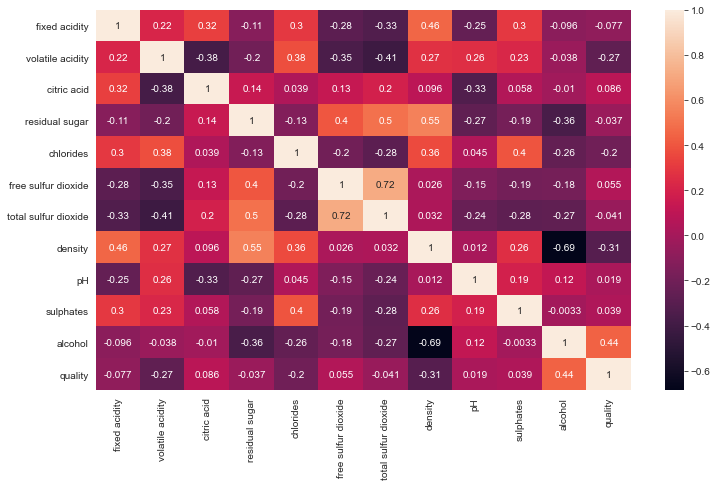

In [4]:
corr = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True);

Outcomes:
- Highest correlation in
    - alcohol and density (it is logical: alcohol has lower specific gravity to water(SG=0.794 => SG<1) 
    - alcohol and quality (interesting)
    - density and residual_sugar (it is logical: sugar has higher specific gravity to water (SG>1) ) 
    - residual_sugar and sulphur dioxide ( logical: sugar possitively affects to fermentation, actually starts the fermentation process, sulphur, on the other hand, decreases fermantation process and preserves the wine from additional fermetization in bottles. 
- In next steps during increasing model predicativity steps __drop density__ feature from the feature list

#### Focus on high quality wines. What component adds wine excellent flavour?

In [110]:
df['high_quality'] = df.quality.apply(lambda x: 1 if x == 9 else 0)

In [111]:
df.high_quality.value_counts()

0    6492
1       5
Name: high_quality, dtype: int64

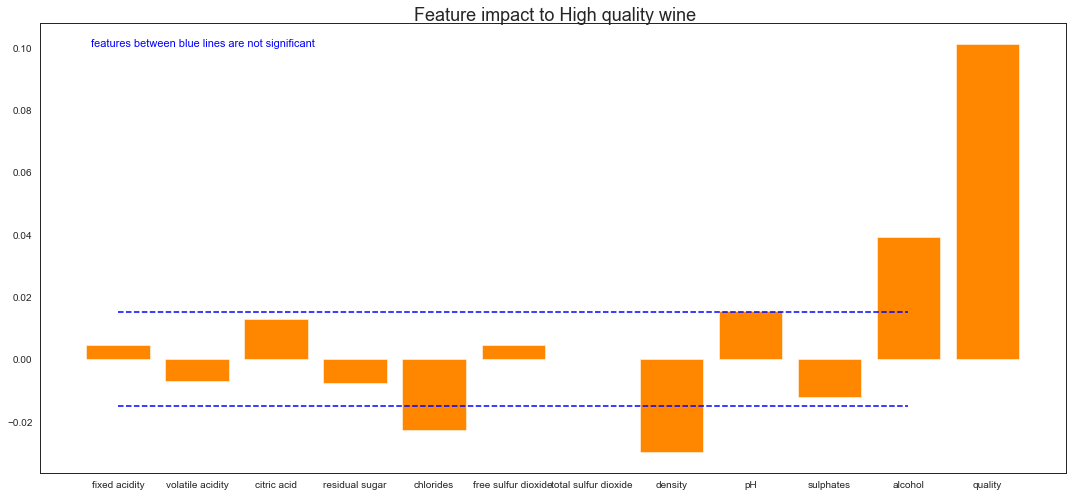

In [112]:
corr = df.corr()
fig = plt.figure(figsize=(15,7))
a = corr.high_quality[:-2]
ax = fig.add_subplot(111)
plt.bar(a.index,a,color='#ff8700')
plt.plot(range(11),[0.015]*11,'b--')
plt.plot(range(11),[-0.015]*11,'b--')
plt.title(' Feature impact to High quality wine',pad=3, fontdict={'fontsize':18} )
plt.text(.05,.95,'features between blue lines are not significant',fontsize=11, c='b',transform=ax.transAxes)
fig.tight_layout();

As minimum in model will be included  
   - clorides, 
   - density,
   - pH,
   - alcohol

Density has a high influence to high_quality_wine, it shouldn't be removed.

#### Focus on medium_quality wines. What component adds wine excellent flavour?

In [82]:
medium_quality = range(5,9)
df['medium_quality'] = df.quality.apply(lambda x: 1 if x in medium_quality else 0)

In [95]:
df.loc[df.quality == 3].head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,high_quality,medium_quality
251,white,8.5,0.26,0.21,16.2,0.074,41.0,197.0,0.9980,3.02,0.50,9.8,3,0,0
253,white,5.8,0.24,0.44,3.5,0.029,5.0,109.0,0.9913,3.53,0.43,11.7,3,0,0
294,white,9.1,0.59,0.38,1.6,0.066,34.0,182.0,0.9968,3.23,0.38,8.5,3,0,0
445,white,7.1,0.32,0.32,11.0,0.038,16.0,66.0,0.9937,3.24,0.40,11.5,3,0,0
740,white,6.9,0.39,0.40,4.6,0.022,5.0,19.0,0.9915,3.31,0.37,12.6,3,0,0


In [105]:
df.medium_quality.value_counts()

1    6246
0     251
Name: medium_quality, dtype: int64

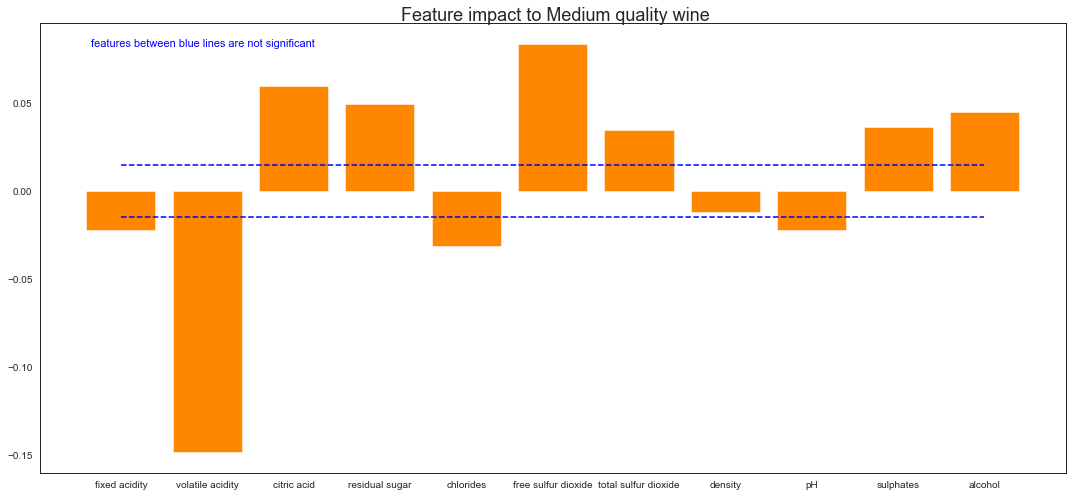

In [96]:
corr = df.corr()
fig = plt.figure(figsize=(15,7))
a = corr.medium_quality[:-3]
ax = fig.add_subplot(111)
plt.bar(a.index,a,color='#ff8700')
plt.plot(range(11),[0.015]*11,'b--')
plt.plot(range(11),[-0.015]*11,'b--')
plt.title(' Feature impact to Medium quality wine',pad=3, fontdict={'fontsize':18} )
plt.text(.05,.95,'features between blue lines are not significant',fontsize=11, c='b',transform=ax.transAxes)
fig.tight_layout();

**Density** has a **low influence** to medium_quality wine, and **will be removed**.

In [126]:
low_quality = range(1,5)
df['low_quality'] = df.quality.apply(lambda x: 1 if x in low_quality else 0)

**Data analysis conclusion:**

- There are __5 examples__ of high quality wines (__quality = 9 (the highest )__) in dataset. Each of them has specific features, different from the medium wines
    - clorides,
    - density,
    - pH,
    - alcohol

- The medium wines are __6246 examples__  (__quality = between 5 and 8__)
    - all features are significant except density
    - Density has a low influence to medium_quality wine, and should be removed
    
- the other wines will be considered as low quality wine __246 examples__

#### Feature generation. 
##### Checking positive and negative factors

- type - __categorical__ [RED,WHITE]
- fixed acidity - __positive__ (originate in grapes and unique for each grape sort and territory. the positive acids:
    - tartaric
    - and malic
    - citric.
- volatile acidity - __negative__ 
- citric acid - __positive__ (acid originates in grapes (one of the components of the fixed acids))
- residual sugar - no pros and cons
- chlorides - __negative__ 
- free sulfur dioxide - __negative__ 
- total sulfur dioxide - __negative__
- density - no pros and cons
- pH - no pros and cons, the lower the pH, the more acidic the wine is.
- sulphates - __negative__ 
- alcohol - __positive__


In [99]:
positive = [
    'fixed acidity',
    'citric acid',
    'alcohol'
]

neutral = [
    'type',
    'residual sugar ',
    'density',
    'pH'
]

negative = [
    'volatile acidity',
    'chlorides', 
    'free sulfur dioxide',
    'total sulfur dioxide', 
    'sulphates'
]

##### Split quality to 3 groups  ['low','medium','high']

In [3]:
a = {i:'low' if i < 5 else 'medium' if i<9 else 'high'  for i in range(1,10) }
df['quality_cat'] = df.quality.map(a)
a

{1: 'low',
 2: 'low',
 3: 'low',
 4: 'low',
 5: 'medium',
 6: 'medium',
 7: 'medium',
 8: 'medium',
 9: 'high'}

Make violinplot for __positive__ and __negative__ features

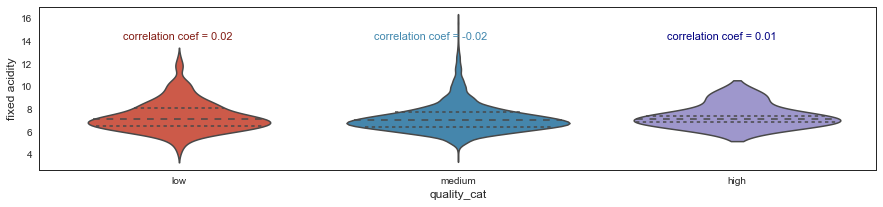

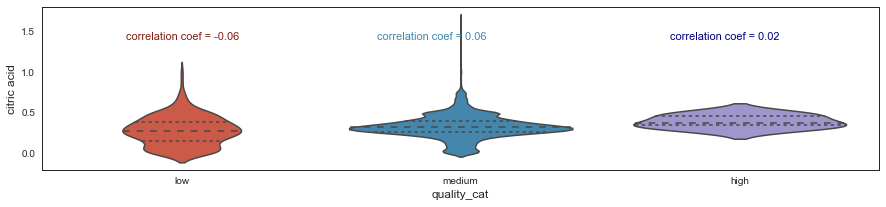

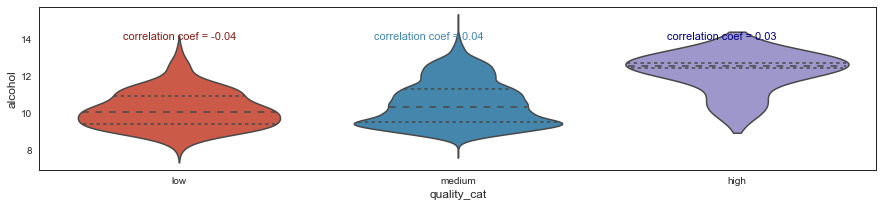

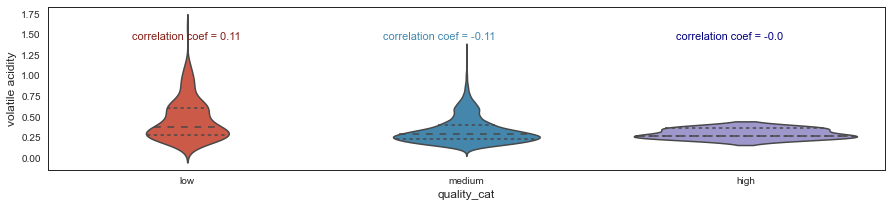

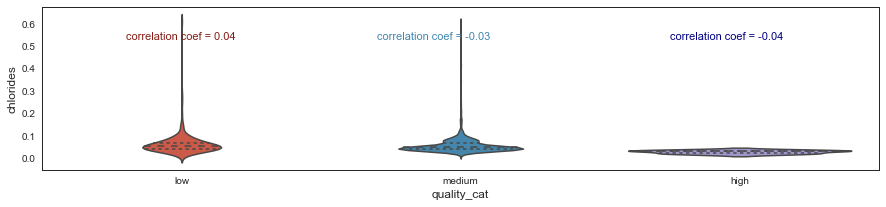

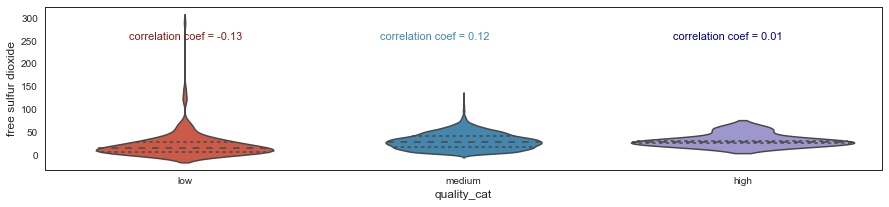

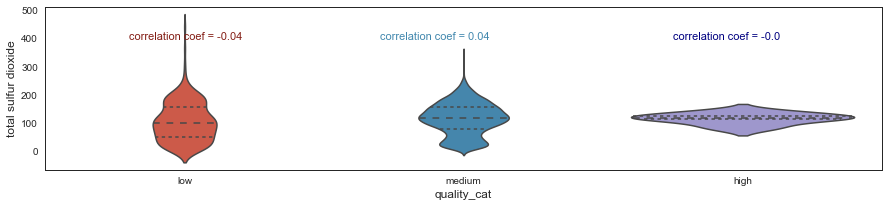

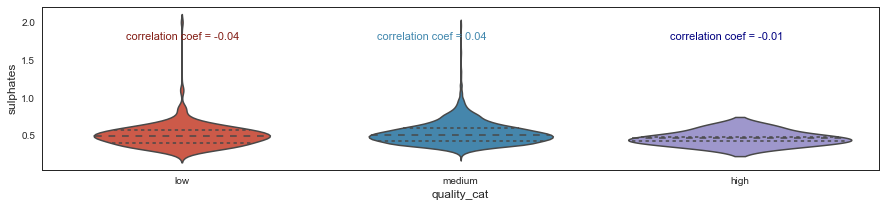

In [302]:
for i in positive+negative:
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot()
    sns.violinplot('quality_cat',i,data=df,orient='v',order=['low','medium','high'],inner = "quartile")
    corr_coef = [round(j,2) for j in list(corr[i][['low_quality','medium_quality','high_quality']])]
    plt.text(.1,.8,'correlation coef = {}'.format(corr_coef[0]),fontsize=11, c='#831d15',transform=ax.transAxes)
    plt.text(.4,.8,'correlation coef = {}'.format(corr_coef[1]),fontsize=11, c='#4288ae',transform=ax.transAxes)
    plt.text(.75,.8,'correlation coef = {}'.format(corr_coef[2]),fontsize=11, c='#000080',transform=ax.transAxes)
    
    plt.show();
    

__Conclusion:__

Significantly varies per quality category:
   - citricic acid 
   - sulphur dioxide 
   - alcohol

__Fixed_acid__ is a __positive__ feature, and the __fixed_acid consists of citricic acid, tartaric and malic acids__.   

In dataset we have only 'citric acid' column. We add to dataset tartaric and malic acids by the following equation 

__other_acids__ = 'fixed acidity' - 'citric acid'  





In [313]:
df['other_acids'] = df.apply(lambda x: x['fixed acidity'] - x['citric acid'],axis=1 )

By what features the High_quality wines differ from the_other wines? 

We will check by boxplot ( becouse it shows median and quantiles.):

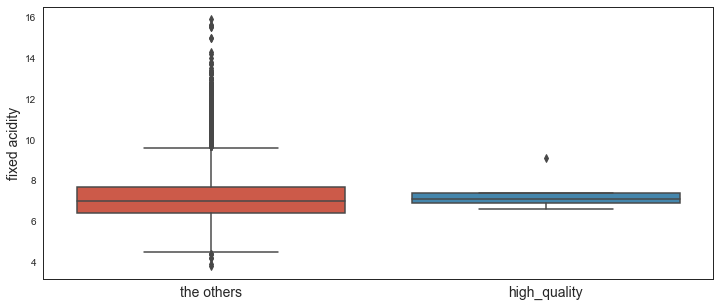

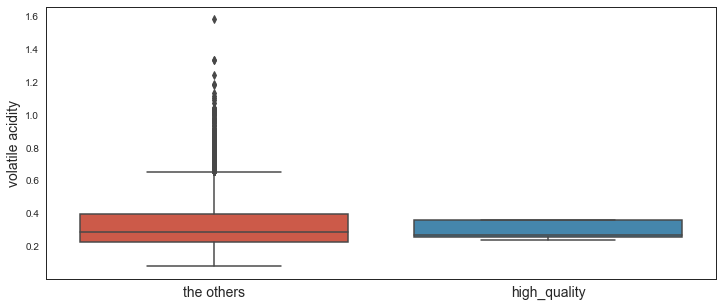

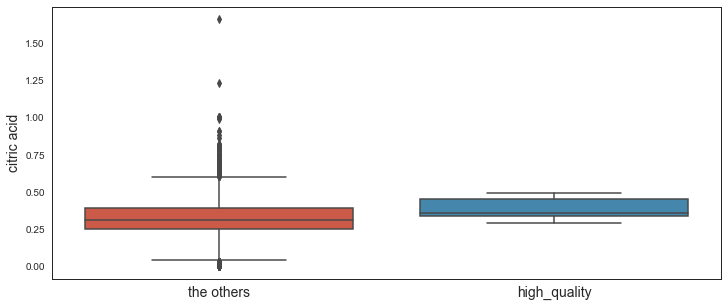

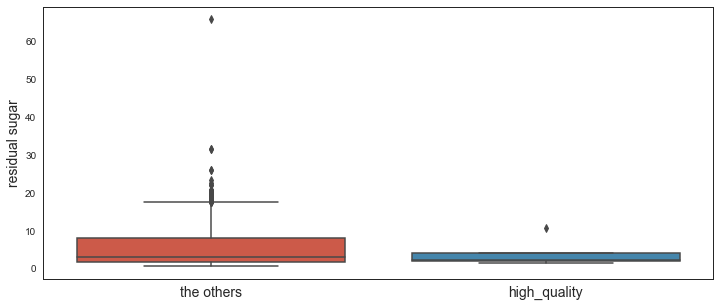

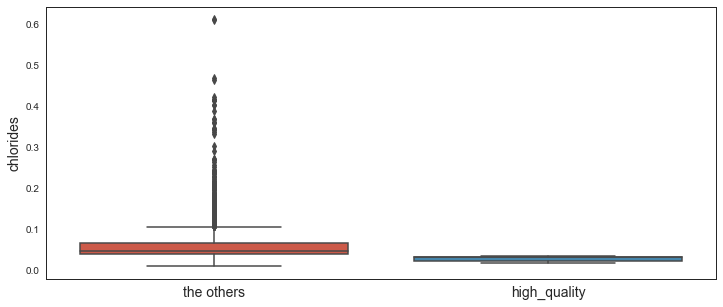

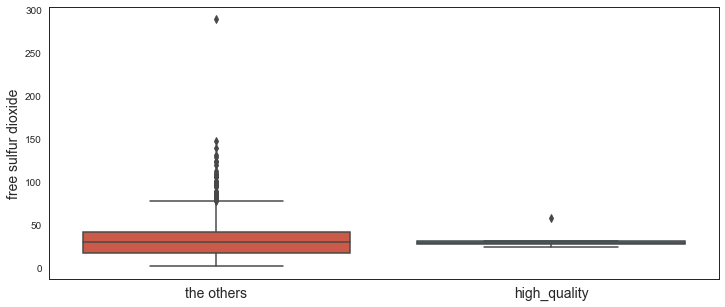

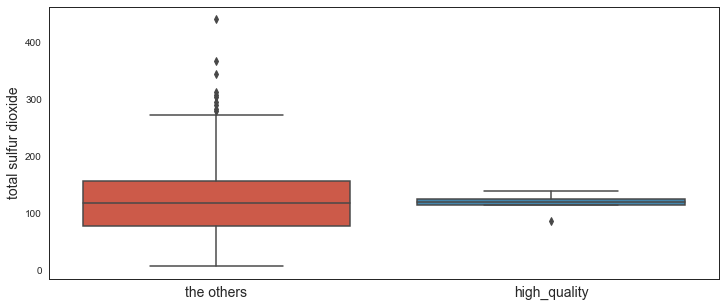

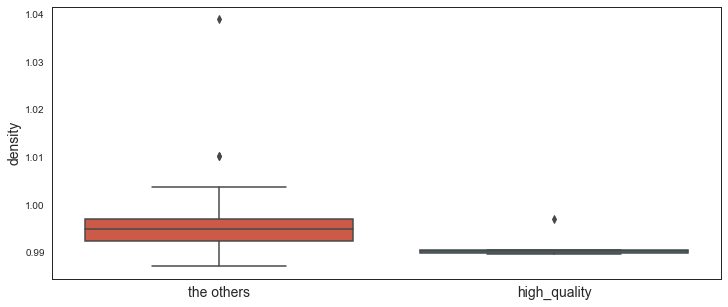

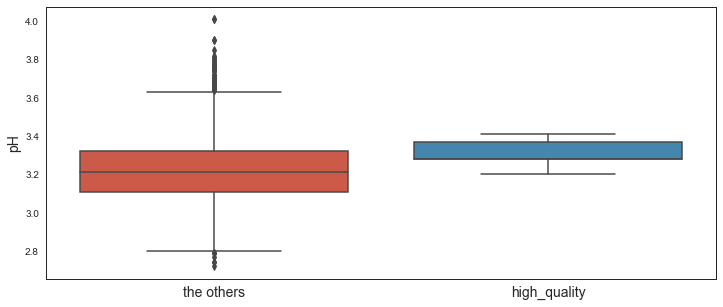

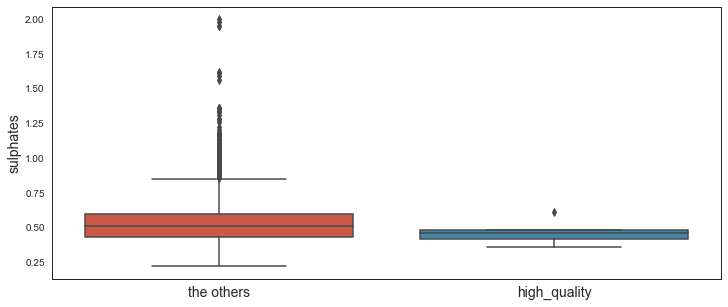

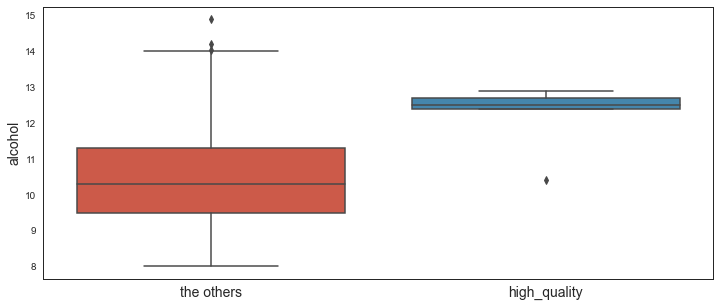

In [355]:
features = df.columns[1:12]
group_0,group_1 = df.groupby(by='high_quality')
for i in features:

    result = []
    result.append(np.array(group_0[1][i]) )
    result.append(np.array(group_1[1][i]) )
    
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot()
    sns.boxplot(data=result,ax=ax)
    ax.set_xticklabels(['the others','high_quality'],fontsize=14)
    ax.set_ylabel(i,fontsize=14)
    plt.show()
    #break


The highest statistical difference are:
- 'pH' feature  
- 'alcohol' feature

#### Hypotheses:
as soon as the dataset is short (len(df) = 6497) and 11 features we do not need compicated deep learning models.  
The simple __Random Forest__ will be enough.   
But we have not balanced examples (high_quality wines count =5), so additional __weightening__ method will be added.

### Data Preparation
#### Transform Categories to One_hot

In [4]:
a = {'white':1, 'red':0}
wine_type = df.type.map(a)
wine_type = pd.Series(wine_type,name='Wine_type_white')
wine_type.head()

0    1
1    1
2    1
3    1
4    1
Name: Wine_type_white, dtype: int64

#### Cooking missing values

In [5]:
for i in df.columns:
    a = df[i].isna().sum()
    if a !=0:
        print(' "{}" has missed values = {}'.format( i,a) )

 "fixed acidity" has missed values = 10
 "volatile acidity" has missed values = 8
 "citric acid" has missed values = 3
 "residual sugar" has missed values = 2
 "chlorides" has missed values = 2
 "pH" has missed values = 9
 "sulphates" has missed values = 4


In [6]:
df_without_NA = pd.DataFrame()

# Fill missing 'fixed acidity' by mean same quality and wine type
df_without_NA['fixed acidity'] = df['fixed acidity'].fillna( 
                df.groupby(by=['quality','type'])['fixed acidity'].transform('mean') )

# Fill missing 'volatile acidity' by median same quality and wine type
df_without_NA['volatile acidity'] = df['volatile acidity'].fillna( 
                df.groupby(by=['quality','type'])['volatile acidity'].transform('median') )


# Fill missing 'citric acid' by median same quality and wine type
df_without_NA['citric acid'] = df['citric acid'].fillna( 
                df.groupby(by=['quality','type'])['citric acid'].transform('median') )

# Fill missing 'residual sugar' by mean same quality and wine type
df_without_NA['residual sugar'] = df['residual sugar'].fillna( 
                df.groupby(by=['quality','type'])['residual sugar'].transform('mean') )


# Fill missing 'chlorides' by mean same quality and wine type
df_without_NA['chlorides'] = df['chlorides'].fillna( 
                df.groupby(by=['quality','type'])['chlorides'].transform('mean') )


# Fill missing 'pH' by mean same quality and wine type
df_without_NA['pH'] = df['pH'].fillna( 
                df.groupby(by=['quality','type'])['pH'].transform('mean') )


# Fill missing 'sulphates' by mean same quality and wine type
df_without_NA['sulphates'] = df['sulphates'].fillna( 
                df.groupby(by=['quality','type'])['sulphates'].transform('mean') )

# make the other_acids
df_without_NA['other_acids'] = df_without_NA.apply(lambda x: x['fixed acidity'] - x['citric acid'],axis=1 )

#### Creating dataset:

Adding the other features (without missing values) from initial dataset:
   - 'free sulfur dioxide',
   - 'total sulfur dioxide',
   - 'density',
   - 'alcohol',
   - 'quality_cat'

In [7]:
#columns in original dataset (df) where is no missed data

features_wo_missed_values = [
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'alcohol']

features_wo_missed_values

['free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol']

In [8]:
#preparing features
X = pd.concat( [df_without_NA,wine_type,df[features_wo_missed_values] ],axis=1 )

#preparing target
a = {'low':0,
    'medium':1,
    'high':2}
y = df['quality_cat'].map(a)

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,pH,sulphates,other_acids,Wine_type_white,free sulfur dioxide,total sulfur dioxide,density,alcohol
0,7.0,0.27,0.36,20.7,0.045,3.00,0.45,6.64,1,45.0,170.0,1.0010,8.8
1,6.3,0.30,0.34,1.6,0.049,3.30,0.49,5.96,1,14.0,132.0,0.9940,9.5
2,8.1,0.28,0.40,6.9,0.050,3.26,0.44,7.70,1,30.0,97.0,0.9951,10.1
3,7.2,0.23,0.32,8.5,0.058,3.19,0.40,6.88,1,47.0,186.0,0.9956,9.9
4,7.2,0.23,0.32,8.5,0.058,3.19,0.40,6.88,1,47.0,186.0,0.9956,9.9


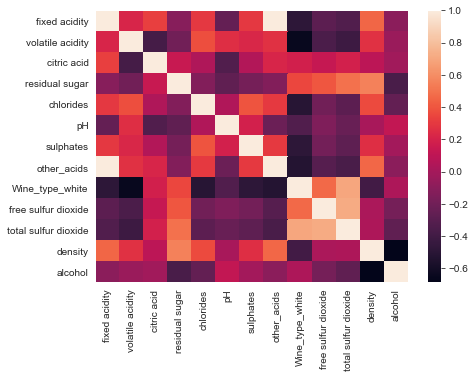

In [456]:
# finaly check correlation again. Maybe there is high correlation and it will decrease precision. 

sns.heatmap(X.corr()) ;

Correlation matrix notes:  
__'wine_type_white'__ has a strong negative correlation with 6 main features.

### Modelling

In [9]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.15,random_state=255)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=.2,random_state=255)

In [10]:
# check high_quality wine class in train, validation and test datasets

np.bincount(y_train), np.bincount(y_test),np.bincount(y_val)

(array([ 181, 4232,    4], dtype=int64),
 array([ 30, 944,   1], dtype=int64),
 array([  35, 1070], dtype=int64))

There is NO high_quality wine class in validation dataset. Pop one from train dataset.

In [11]:
# Class 2 is missed in validation array 

X_val = X_val.append(X_train.loc[876,])
y_val = y_val.append(pd.Series(y_train.loc[876],index=[876]))

X_train.drop(index=876,inplace=True)
y_train.drop(index=876,inplace=True)

In [12]:
np.bincount(y_train), np.bincount(y_test),np.bincount(y_val)

(array([ 181, 4232,    3], dtype=int64),
 array([ 30, 944,   1], dtype=int64),
 array([  35, 1070,    1], dtype=int64))

In [1141]:
# it is need to catch high _quality wine. Thus, increasing high_quality wine class weight:
class_weight = {0:.1, 1:1, 2:2000}
class_weight

{0: 0.1, 1: 1, 2: 2000}

__making oversampling for train data__

In [1038]:
# take the data from the beggining. the features that correlate with high qiality wine.

high_features = [
    'chlorides',
    'density',
    'pH',
    'alcohol'
]

In [1052]:
# and check the statistical relevance :
print('feature \t|\t criteria_student_1samp |\t p_value')
print('-'*85)
for i in high_features:
    high_array = np.array(X_y_data.loc[X_y_data.quality_cat==2,:][i])
    medium_array = np.array(X_y_data.loc[X_y_data.quality_cat==1,:][i])
    
    criteria_studdent_1samp = stats.ttest_1samp(a=high_array,popmean=np.mean(medium_array) )
    print(i,'\t |\t',criteria_studdent_1samp[0] ,'\t|\t', criteria_studdent_1samp[1])

feature 	|	 criteria_student_1samp |	 p_value
-------------------------------------------------------------------------------------
chlorides 	 |	 -8.545750269735775 	|	 0.001029223611661879
density 	 |	 -2.3157464451468592 	|	 0.08151628253794123
pH 	 |	 2.4367490957364 	|	 0.0714585302044161
alcohol 	 |	 3.70123942762863 	|	 0.020812843901582855


The features: chlorides and alcohol is statistical significant.

__We will make samples from medium wine with changing chlorides and alcohol features to correspond high_quality wines__

In [13]:
def make_new_sample_from_medium(n,dataset):
    '''
        MAKE NEW SAMPLE FROM MEDIUM QUALITY WINES ADDING chlorides AND alcohol
        N - new samples amount
    '''

    high_chlorides = np.array(dataset.loc[dataset.quality_cat==2,'chlorides'])
    high_alcohol = np.array(dataset.loc[dataset.quality_cat==2,'alcohol'])

    new_item_chlorides = stats.norm.rvs(loc=np.mean(high_chlorides), scale=np.std(high_chlorides),size=n)
    new_item_alcohol = stats.norm.rvs(loc=np.mean(high_alcohol), scale=np.std(high_alcohol),size=n)

    medium_quality_wines = dataset[dataset.quality_cat==1]

    new_item = np.random.choice(medium_quality_wines.index,size=n)

    new_item = medium_quality_wines.loc[new_item,:]

    new_item.chlorides = new_item_chlorides
    new_item.alcohol = new_item_alcohol
    new_item.quality_cat = [2]*n
    
    dataset = dataset.append(new_item)
    
    return dataset

In [14]:
X_y_train = pd.concat([X_train,y_train],axis=1)
X_y_train = make_new_sample_from_medium(n=501,dataset=X_y_train)
y_train = X_y_train.quality_cat
X_train = X_y_train.iloc[:,:-1]

np.bincount(y_train)

array([ 181, 4232,  504], dtype=int64)

Now we have:
- 181 low quality wines
- 4232 medium quality wines
- 504 high quality wines

In [ ]:
# Also we can make samples by MEAN OF TWO RANDOM CHOSEN SAMPLES

In [987]:
def make_new_sample(n,dataset):
    '''
        MAKE NEW SAMPLE FROM MEAN OF TWO RANDOM CHOSEN SAMPLES
        N - new samples amount
    '''
    for i in range(n):
        index_1, index_2 = np.random.randint(low=0,high=len(dataset)-1,size=2)
        b = np.array(dataset)
        new_item = (b[index_1]+b[index_2])/2
        new_item = pd.DataFrame(new_item.reshape(1,-1), columns=a.columns)
        dataset = dataset.append(new_item)
    dataset.reset_index(inplace=True)
    dataset.drop(columns='index',inplace=True)
    return dataset


In [988]:
# X_y_train = pd.concat([X_train,y_train],axis=1)
# a = X_y_train[X_y_train.quality_cat==2]
# a.reset_index(inplace=True)
# a.drop(columns='index',inplace=True)

# #make new samples by mean of two random chosen samples
# a = make_new_sample(1002,a)

# X_y_train = pd.concat([a,X_y_train],axis=0)

# y_train = X_y_train.quality_cat
# X_train = X_y_train.iloc[:,:-1]

# np.bincount(y_train)

array([ 181, 4232, 1008], dtype=int64)

In [645]:
#method №2. Simple duplicating high_quality wines in train dataset

# X_y_train = pd.concat([X_train,y_train],axis=1)
# a = X_y_train[X_y_train.quality_cat==2]
# a = a.sample(n=len(X_y_train)//2,random_state=255,replace=True)

# X_y_train = pd.concat([a,X_y_train],axis=0)

# y_train = X_y_train.quality_cat
# X_train = X_y_train.iloc[:,:-1]

# np.bincount(y_train)

array([ 181, 4232, 2211], dtype=int64)

In [15]:
#making 100 duplicates of high_quality wine to validation dataset

X_y_val = pd.concat([X_val,y_val],axis=1)
a = X_y_val[X_y_val[0]==2]
a = a.sample(n=100,random_state=255,replace=True)

X_y_val = pd.concat([a,X_y_val],axis=0)

y_val = X_y_val[0]
X_val = X_y_val.iloc[:,:-1]

np.bincount(y_val)

array([  35, 1070,  101], dtype=int64)

Loading ML libraries and fitting to train dataset

In [16]:
# load sklearn libraries

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm.sklearn import LGBMClassifier

In [18]:
# adding more weight to high_qiality wine

class_weight = {0:.1, 1:1, 2:5}
class_weight

{0: 0.1, 1: 1, 2: 5}

In [19]:
# initiate classificators

lgc = LGBMClassifier(n_estimators=300,class_weight=class_weight,random_state=255, n_jobs=-1)

rf = RandomForestClassifier(n_estimators=300,n_jobs=-1,random_state=255,class_weight=class_weight )

logit = LogisticRegression(class_weight=class_weight,max_iter=300, multi_class='multinomial',n_jobs=-1)

bag = BaggingClassifier(base_estimator=logit,n_estimators=50, n_jobs=-1 )

classifiers = [
    ('logit',make_pipeline(StandardScaler(),logit) ),
    ('dt', DecisionTreeClassifier(max_features=1,class_weight=class_weight)),
    ('svc', make_pipeline(StandardScaler(),SVC(class_weight=class_weight,random_state=255)) ),
    ('lgc', lgc),
    
]
st = StackingClassifier(estimators=classifiers, final_estimator=logit, n_jobs=-1 )

Checking ML models results.

Spoiler:
__Unfortunately NO one ML model can 'catch' high_quality wine__

In [892]:
# for RandomForest

rf.fit(X_train,y_train)
acc = rf.score(X_val,y_val,y_val.map(class_weight))
print('accuracy score = ',acc)

y_pred = rf.predict(X_val)
print(classification_report(y_val,y_pred))

accuracy score =  4.1939410903623335e-05
              precision    recall  f1-score   support

           0       0.83      0.14      0.24        35
           1       0.97      1.00      0.99      1070
           2       0.00      0.00      0.00         1

    accuracy                           0.97      1106
   macro avg       0.60      0.38      0.41      1106
weighted avg       0.97      0.97      0.96      1106



In [1110]:
# for logit
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
st.fit(X_train_scaled,y_train)
X_val_scaled = scaler.transform(X_val)
acc = rf.score(X_val_scaled,y_val,y_val.map(class_weight))
print('accuracy score = ',acc)

y_pred = rf.predict(X_val)
print(classification_report(y_val,y_pred))

accuracy score =  1.3667950803187364e-05
              precision    recall  f1-score   support

           0       0.83      0.14      0.24        35
           1       0.97      1.00      0.99      1070
           2       0.00      0.00      0.00         1

    accuracy                           0.97      1106
   macro avg       0.60      0.38      0.41      1106
weighted avg       0.97      0.97      0.96      1106



#### Going Deep

In [21]:
# Use NN Luke! 
# loading NN libraries and visualisation function
import tensorflow as tf
import keras

def make_plots(model, name='Test', save=False):
    fig = plt.figure(figsize=(15,5))
    fig.suptitle(name, fontsize=20)

    fig.add_subplot(121)
    plt.plot(model.history.history['loss'],'b--',label='train')
    plt.plot(model.history.history['val_loss'],'g-',label='validation')
    plt.legend(loc='best')
    plt.ylabel('loss')
    x_right_limit = len(model.history.history['loss'])
    tick = int((x_right_limit+1)/10)
    plt.xticks(range(0,x_right_limit+1,tick))
    plt.grid()
    plt.xlabel('epochs')
    plt.title('Loss_vs_epoch');

    fig.add_subplot(122)
    plt.plot(model.history.history['sparse_categorical_accuracy'],'b--',label='train')
    plt.plot(model.history.history['val_sparse_categorical_accuracy'],'g-',label='validation')
    plt.legend(loc='best')
    plt.ylabel('accuracy')
    plt.xticks(range(0,x_right_limit+1,tick))
    plt.grid()
    plt.xlabel('epochs')
    plt.title('Accuracy_vs_epoch');
    
    if save: fig.savefig(name)

In [1144]:
#Define model
model_1 = keras.Sequential([
    keras.Input(shape=X_train.shape[1:]),
    keras.layers.Flatten(),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(32,activation='softmax'),
    keras.layers.Dense(3,activation = 'softmax')
])

#summary
print(model_1.summary() )

# compile
model_1.compile(optimizer='adam', 
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
#callbacks
callback = [
        tf.keras.callbacks.ModelCheckpoint(
        filepath='./saved_models/model_1.{epoch:03d}-loss_{val_loss:5.2f}-acc_{val_sparse_categorical_accuracy:.3f}.h5',
        save_best_only=True,
        save_weights_only=True,
        monitor='val_loss',
        save_freq='epoch',
        mode='max') ]

#train
history = model_1.fit(X_train,
               y_train,
               batch_size=15,
               epochs=30,
               validation_data=(X_val,y_val),
               class_weight=class_weight,
               callbacks=callback,
               verbose=0)
print('Done!')

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 13)                0         
_________________________________________________________________
dense_106 (Dense)            (None, 32)                448       
_________________________________________________________________
dense_107 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_108 (Dense)            (None, 3)                 99        
Total params: 1,603
Trainable params: 1,603
Non-trainable params: 0
_________________________________________________________________
None
Done!


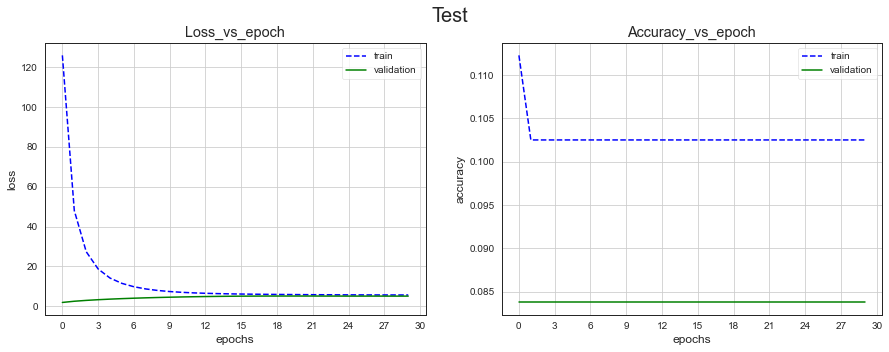

In [1145]:
make_plots(model_1)

In [1146]:
y_pred = model_1.predict(X_val)
y_pred= np.argmax(y_pred,axis=1)

acc = accuracy_score(y_val,y_pred,sample_weight = np.array(y_val.map(class_weight)))
print('accuracy score = ',acc)

print(classification_report(y_val,y_pred))

accuracy score =  0.9947137366520004
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.00      0.00      0.00      1070
           2       0.08      1.00      0.15       101

    accuracy                           0.08      1206
   macro avg       0.03      0.33      0.05      1206
weighted avg       0.01      0.08      0.01      1206



__Result__:

Machine __started 'catching'__ high_quality wines but quality of 'catching' is poor.  


It will be built a bit complicated model to increace 'catching' precision.

In [133]:
#Define a model that utilizes bidirectional SimpleRNN
model_2 = keras.models.Sequential()

# make shape of features values acceptable to RNN layer
X_train_reshaped =  np.array(X_train).reshape(X_train.shape[0],-1,X_train.shape[1])
X_val_reshaped =  np.array(X_val).reshape(X_val.shape[0],-1,X_val.shape[1])

#input
model_2.add(keras.layers.Input(shape=X_train_reshaped.shape[1:],dtype=np.float32 ))

#make bidirectional  LSTM
LSTM_layer = keras.layers.LSTM(units = 16,
          activation = 'tanh',
          recurrent_activation = 'sigmoid', 
          return_sequences=True) 
model_2.add( keras.layers.Bidirectional(LSTM_layer) )

#make Conv1D
model_2.add( keras.layers.Convolution1D(filters=64, kernel_size=3,padding='same', 
                            activation = keras.activations.relu ) )

#make Conv1D
model_2.add( keras.layers.Convolution1D(filters=32, kernel_size=2,padding='same', 
                            activation = keras.activations.relu ) )

model_2.add( keras.layers.Flatten() )

#make 2 Dense layers
model_2.add( keras.layers.Dense(64,activation=keras.activations.relu) )
#model_2.add( keras.layers.Dropout(.3) )

model_2.add( keras.layers.Dense(32,activation=keras.activations.relu) )
#model_2.add( keras.layers.Dropout(.1) )

# output
model_2.add( keras.layers.Dense(3,activation=keras.activations.softmax) )

#summary
print(model_2.summary() )

# compile
model_2.compile(optimizer='adam', 
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

#callbacks
callback = [
        tf.keras.callbacks.ModelCheckpoint(
        filepath='./saved_models/model_2.{epoch:03d}-val_loss_{val_loss:.2f}.h5',
        save_best_only=True,
        save_weights_only=True,
        monitor='val_loss',
        save_freq='epoch',
        mode='min') ]

#train
history = model_2.fit(X_train_reshaped,
               y_train,
               batch_size=3,
               epochs=100,
               validation_data=(X_val_reshaped,y_val),
               class_weight=class_weight,
               verbose=0,
               callbacks=callback)

print('Done!')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 1, 32)             3840      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 1, 64)             6208      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 1, 32)             4128      
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                

In [23]:
# build calulation graph to increase prediction calculation
@tf.function  
def predict(model,array):
    return model(array)

In [24]:
# make function to calculate accuracy by batches

from tqdm.notebook import tqdm

def accuracy_for_batch_model(model,batch_size,test_X, test_y):
    y_pred_all = np.array([])
    batches = len(test_X)//batch_size
    
    for i in tqdm(range(0,batches,1)):
        
        y_pred = np.array( predict(model,test_X[i*3:i*3+3]) )
        y_pred = y_pred.reshape(3,-1)
        y_pred = np.ravel( np.argmax(y_pred,axis=1) )
        y_pred_all = np.append(y_pred_all, y_pred )
    
    if len(test_y)>len(y_pred_all):
        
        a= len(test_y) - len(y_pred_all)
        y_pred = np.array( predict(model,test_X[-3:]) )
        y_pred = y_pred.reshape(3,-1)
        y_pred = np.ravel( np.argmax(y_pred,axis=1) )
        y_pred_all = np.append(y_pred_all, y_pred[-a:] )
        
    acc = accuracy_score(test_y ,y_pred_all )
    
    return acc, y_pred_all

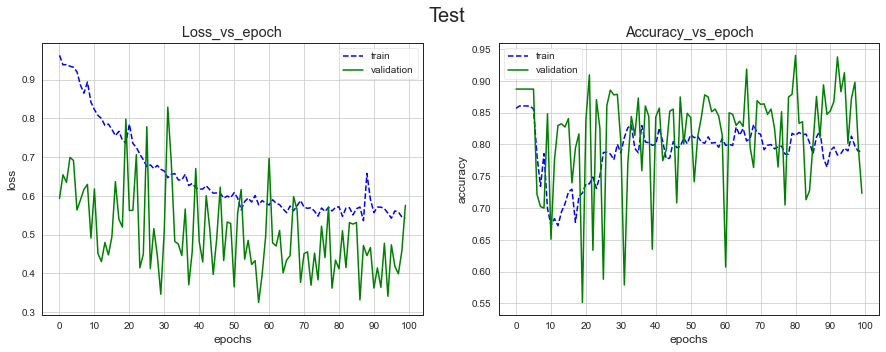

In [94]:
make_plots(model_2)

In [85]:
# the highest accuracy and lowest loss were at epoch 65. Thus load this epoch weights.
model_2.load_weights('./saved_models/model_2.065-val_loss_0.34.h5')

In [146]:
# check validation result

acc,y_pred = accuracy_for_batch_model(model=model_2, batch_size=3,test_X=X_val_reshaped,test_y=y_val)
print('accuracy score = ',acc)

print(classification_report(y_val,y_pred))


accuracy score =  0.9162520729684909
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.97      0.94      0.95      1070
           2       0.59      1.00      0.75       101

    accuracy                           0.92      1206
   macro avg       0.52      0.65      0.57      1206
weighted avg       0.91      0.92      0.91      1206



Checking results for y_test and X_test

In [88]:
# adding 100 duplicates of high_quality wine to test dataset

X_y_test = pd.concat([X_test,y_test],axis=1)
a = X_y_test[X_y_test['quality_cat']==2]
a = a.sample(n=100,random_state=255,replace=True)

X_y_test = pd.concat([a,X_y_test],axis=0)

y_test = X_y_test['quality_cat']
X_test = X_y_test.iloc[:,:-1]

np.bincount(y_test)

array([ 30, 944, 201], dtype=int64)

In [142]:
# check final result

X_test_reshaped =  np.array(X_test).reshape(X_test.shape[0],-1,X_test.shape[1])

acc,y_pred = accuracy_for_batch_model(model=model_2, batch_size=3, test_X = X_test_reshaped, test_y = y_test)
print('accuracy score = ',acc)

print(classification_report(y_test,y_pred))


accuracy score =  0.9276595744680851
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.97      0.94      0.95       944
           2       0.79      1.00      0.88       201

    accuracy                           0.93      1175
   macro avg       0.58      0.65      0.61      1175
weighted avg       0.91      0.93      0.92      1175



### Model appraisal,  Project goal correspondence check.

__Document Conclusions__:

- Dataset has unbalanced classes. For example we deal with:
    - low_qiality_wines = 250 samples, 
    - medium_qiality_wines = 6250 samples,
    - high_qiality_wines = 5 samples.
- To correctly measure high_qiality_wines, 100 duplicates of high_quality wines were added in valiation and test datasets, 
- Also (for train purpouse) __quasi- high_qiality_wines__ were added in train dataset,
- Quasi- high_qiality_wines were made by fitting(upgrading) medium_quality_wine to high_quality (please see para.3.3),

__Model appraisal__:

The final model (model_2) found all high_quality wines with percision 70% and recall 100%


__The project goals__:
- The project goal №1 was to catch all high_qiality_wines and the goal is achieved (f1 score 88%).
- The project goal №2 was to catch all medium_qiality_wines and the goal is achieved (f1 score 95%).